In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import  Path

In [2]:
input_dir=Path("../input/cmi-detect-behavior-with-sensor-data/")
print(list(input_dir.iterdir()))

[PosixPath('../input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation'), PosixPath('../input/cmi-detect-behavior-with-sensor-data/cmi-detect-behavior-with-sensor-data.zip'), PosixPath('../input/cmi-detect-behavior-with-sensor-data/test.csv'), PosixPath('../input/cmi-detect-behavior-with-sensor-data/train_demographics.csv'), PosixPath('../input/cmi-detect-behavior-with-sensor-data/train.csv'), PosixPath('../input/cmi-detect-behavior-with-sensor-data/test_demographics.csv')]


In [3]:
df_tr=pd.read_csv(input_dir/"train.csv")
df_tr.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
print(df_tr.subject.nunique()) #被験者
print(df_tr.sequence_id.nunique()) #総シーケンス
print(df_tr.sequence_type.unique())
df_tr.groupby("subject").nunique()

81
8151
['Target' 'Non-Target']


,row_id,sequence_type,sequence_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
subject,,,,,,,,,,,,,,,,,,,,,
SUBJ_000206,7091,2,102,245,4,4,2,18,2600,2076,...,248,237,251,250,251,247,246,246,243,238
SUBJ_001430,6611,2,102,153,4,4,2,18,2908,2429,...,227,207,250,247,245,243,232,218,211,199
SUBJ_002923,7008,2,102,160,4,4,2,18,2588,2443,...,245,212,250,246,249,246,247,248,240,214
SUBJ_003328,7417,2,102,332,4,4,2,18,3047,2491,...,245,241,250,248,247,250,247,249,238,236
SUBJ_004117,6309,2,102,127,4,4,2,18,2445,2009,...,231,233,238,232,229,231,232,235,232,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUBJ_063319,6650,2,102,160,4,4,2,18,2656,2271,...,236,218,250,245,248,242,245,230,217,220
SUBJ_063346,6676,2,102,156,4,4,2,18,2411,2095,...,225,211,249,239,242,247,239,241,224,231
SUBJ_063447,7055,2,102,211,4,4,2,18,2665,2167,...,233,211,238,233,233,233,233,241,228,229


In [5]:
df_test=pd.read_csv(input_dir/"test.csv")
df_test.groupby("subject").nunique()

,row_id,sequence_id,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
subject,,,,,,,,,,,,,,,,,,,,,
SUBJ_016452,51,1,51,32,36,35,49,50,50,50,...,1,1,1,1,1,1,1,1,1,1
SUBJ_055840,56,1,56,46,33,41,53,55,55,52,...,27,34,14,16,13,5,18,25,33,32


In [6]:
print(df_tr.loc[df_tr.subject == "SUBJ_016452"])
print(df_tr.loc[df_tr.subject == "SUBJ_055840"])

Empty DataFrame
Columns: [row_id, sequence_type, sequence_id, sequence_counter, subject, orientation, behavior, phase, gesture, acc_x, acc_y, acc_z, rot_w, rot_x, rot_y, rot_z, thm_1, thm_2, thm_3, thm_4, thm_5, tof_1_v0, tof_1_v1, tof_1_v2, tof_1_v3, tof_1_v4, tof_1_v5, tof_1_v6, tof_1_v7, tof_1_v8, tof_1_v9, tof_1_v10, tof_1_v11, tof_1_v12, tof_1_v13, tof_1_v14, tof_1_v15, tof_1_v16, tof_1_v17, tof_1_v18, tof_1_v19, tof_1_v20, tof_1_v21, tof_1_v22, tof_1_v23, tof_1_v24, tof_1_v25, tof_1_v26, tof_1_v27, tof_1_v28, tof_1_v29, tof_1_v30, tof_1_v31, tof_1_v32, tof_1_v33, tof_1_v34, tof_1_v35, tof_1_v36, tof_1_v37, tof_1_v38, tof_1_v39, tof_1_v40, tof_1_v41, tof_1_v42, tof_1_v43, tof_1_v44, tof_1_v45, tof_1_v46, tof_1_v47, tof_1_v48, tof_1_v49, tof_1_v50, tof_1_v51, tof_1_v52, tof_1_v53, tof_1_v54, tof_1_v55, tof_1_v56, tof_1_v57, tof_1_v58, tof_1_v59, tof_1_v60, tof_1_v61, tof_1_v62, tof_1_v63, tof_2_v0, tof_2_v1, tof_2_v2, tof_2_v3, tof_2_v4, tof_2_v5, tof_2_v6, tof_2_v7, tof_2_v8, tof_

# 利き手の違いによるIMUデータ比較

In [7]:
# デモグラフィックデータを読み込み
df_demo = pd.read_csv(input_dir / "train_demographics.csv")

# 利き手ごとの被験者を取得
left_handed = df_demo[df_demo['handedness'] == 0]['subject'].tolist()  # 左利き
right_handed = df_demo[df_demo['handedness'] == 1]['subject'].tolist()  # 右利き

print(f"左利き被験者数: {len(left_handed)}")
print(f"右利き被験者数: {len(right_handed)}")
print(f"\n左利き被験者: {left_handed}")

左利き被験者数: 10
右利き被験者数: 71

左利き被験者: ['SUBJ_002923', 'SUBJ_013623', 'SUBJ_019756', 'SUBJ_028998', 'SUBJ_032233', 'SUBJ_032585', 'SUBJ_039234', 'SUBJ_041243', 'SUBJ_055211', 'SUBJ_061552']


In [8]:
# 欠損値の調査
print("=" * 60)
print("全体の欠損値情報")
print("=" * 60)

# 全体の欠損値数と欠損率
missing_count = df_tr.isnull().sum()
missing_rate = (df_tr.isnull().sum() / len(df_tr) * 100).round(2)
missing_df = pd.DataFrame({
    '欠損数': missing_count,
    '欠損率(%)': missing_rate
})

# 欠損があるカラムのみ表示
missing_with_nulls = missing_df[missing_df['欠損数'] > 0].sort_values('欠損率(%)', ascending=False)
print(f"\n欠損があるカラム数: {len(missing_with_nulls)} / {len(df_tr.columns)}")
print(f"\n欠損率上位20カラム:")
print(missing_with_nulls.head(20))

全体の欠損値情報

欠損があるカラム数: 329 / 341

欠損率上位20カラム:
             欠損数  欠損率(%)
thm_5      33286    5.79
tof_5_v63  30142    5.24
tof_5_v24  30142    5.24
tof_5_v18  30142    5.24
tof_5_v19  30142    5.24
tof_5_v20  30142    5.24
tof_5_v21  30142    5.24
tof_5_v22  30142    5.24
tof_5_v23  30142    5.24
tof_5_v25  30142    5.24
tof_5_v16  30142    5.24
tof_5_v26  30142    5.24
tof_5_v27  30142    5.24
tof_5_v28  30142    5.24
tof_5_v29  30142    5.24
tof_5_v30  30142    5.24
tof_5_v31  30142    5.24
tof_5_v17  30142    5.24
tof_5_v15  30142    5.24
tof_5_v33  30142    5.24


In [9]:
# センサータイプ別の欠損率
imu_cols = ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']
thm_cols = [f'thm_{i}' for i in range(1, 6)]
tof_cols = [f'tof_{i}_v{j}' for i in range(1, 6) for j in range(64)]

print("=" * 60)
print("センサータイプ別の欠損率")
print("=" * 60)

# IMUセンサー
imu_missing = df_tr[imu_cols].isnull().sum().sum() / (len(df_tr) * len(imu_cols)) * 100
print(f"\nIMUセンサー ({len(imu_cols)}カラム): {imu_missing:.2f}%")

# Thermopileセンサー
thm_missing = df_tr[thm_cols].isnull().sum().sum() / (len(df_tr) * len(thm_cols)) * 100
print(f"Thermopileセンサー ({len(thm_cols)}カラム): {thm_missing:.2f}%")

# Time-of-Flightセンサー
tof_missing = df_tr[tof_cols].isnull().sum().sum() / (len(df_tr) * len(tof_cols)) * 100
print(f"Time-of-Flightセンサー ({len(tof_cols)}カラム): {tof_missing:.2f}%")

センサータイプ別の欠損率

IMUセンサー (7カラム): 0.37%
Thermopileセンサー (5カラム): 2.11%
Time-of-Flightセンサー (320カラム): 1.91%


In [10]:
# シーケンスごとの欠損パターン分析
print("=" * 60)
print("シーケンスごとの欠損パターン")
print("=" * 60)

# 各シーケンスでのThermopile/ToF欠損率
seq_thm_missing = df_tr.groupby('sequence_id')[thm_cols].apply(lambda x: x.isnull().any().any())
seq_tof_missing = df_tr.groupby('sequence_id')[tof_cols[:5]].apply(lambda x: x.isnull().any().any())  # サンプル

print(f"\nThermopileが欠損しているシーケンス数: {seq_thm_missing.sum()} / {len(seq_thm_missing)} ({seq_thm_missing.mean()*100:.1f}%)")
print(f"ToFが欠損しているシーケンス数: {seq_tof_missing.sum()} / {len(seq_tof_missing)} ({seq_tof_missing.mean()*100:.1f}%)")

# 完全にThermopile/ToFが欠損しているシーケンス（IMUのみ）
seq_thm_all_missing = df_tr.groupby('sequence_id')[thm_cols].apply(lambda x: x.isnull().all().all())
seq_tof_all_missing = df_tr.groupby('sequence_id')[tof_cols[:5]].apply(lambda x: x.isnull().all().all())

print(f"\nThermopileが完全欠損しているシーケンス数: {seq_thm_all_missing.sum()} ({seq_thm_all_missing.mean()*100:.1f}%)")
print(f"ToFが完全欠損しているシーケンス数: {seq_tof_all_missing.sum()} ({seq_tof_all_missing.mean()*100:.1f}%)")

シーケンスごとの欠損パターン

Thermopileが欠損しているシーケンス数: 508 / 8151 (6.2%)
ToFが欠損しているシーケンス数: 96 / 8151 (1.2%)

Thermopileが完全欠損しているシーケンス数: 96 (1.2%)
ToFが完全欠損しているシーケンス数: 96 (1.2%)


/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 27424 (\N{CJK UNIFIED IDEOGRAPH-6B20}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py:28: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_81/1053364197.py

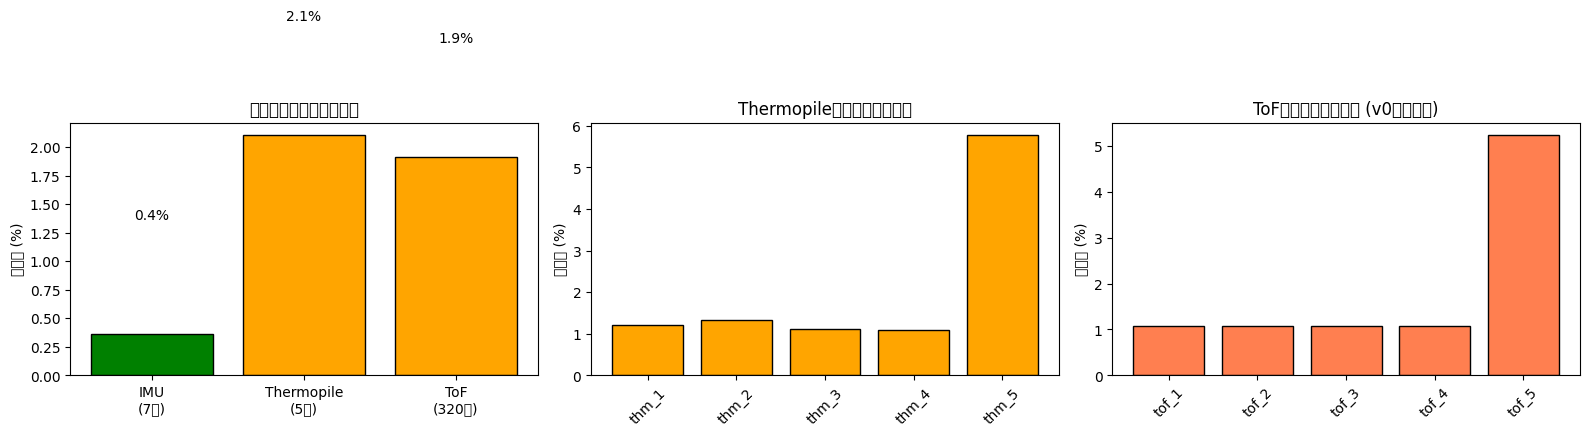

In [11]:
# 欠損率の可視化
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# センサータイプ別欠損率（棒グラフ）
sensor_types = ['IMU\n(7列)', 'Thermopile\n(5列)', 'ToF\n(320列)']
missing_rates = [imu_missing, thm_missing, tof_missing]
colors = ['green' if r < 1 else 'orange' if r < 50 else 'red' for r in missing_rates]
axes[0].bar(sensor_types, missing_rates, color=colors, edgecolor='black')
axes[0].set_ylabel('欠損率 (%)')
axes[0].set_title('センサータイプ別欠損率')
for i, v in enumerate(missing_rates):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# Thermopile各センサーの欠損率
thm_missing_each = [df_tr[f'thm_{i}'].isnull().mean() * 100 for i in range(1, 6)]
axes[1].bar([f'thm_{i}' for i in range(1, 6)], thm_missing_each, color='orange', edgecolor='black')
axes[1].set_ylabel('欠損率 (%)')
axes[1].set_title('Thermopileセンサー別欠損率')
axes[1].tick_params(axis='x', rotation=45)

# ToF各センサーの欠損率（代表ピクセルv0のみ）
tof_missing_each = [df_tr[f'tof_{i}_v0'].isnull().mean() * 100 for i in range(1, 6)]
axes[2].bar([f'tof_{i}' for i in range(1, 6)], tof_missing_each, color='coral', edgecolor='black')
axes[2].set_ylabel('欠損率 (%)')
axes[2].set_title('ToFセンサー別欠損率 (v0ピクセル)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
df_tr["thm_5"].isnull().sum()

33286